# Chebyshev Interpolation

<strong>Introduction:</strong> It is common to choose the base points $x_{i}$ for interpolation to be evenly spaced. In many cases, the data to be interpolated are availbalee only in that form. It turns out that the choice of base point spacing can have a significant effect on the interpolation error. Checbyshev interpolation just refers to a particular optimal way of spacing the points

<strong>Goal:</strong> The motivation for Chebyshev interpolation is to improve control of the maximum value of the interpolation error. 

For example, the figure below shows a plot of the degree 9 polynomial when the points $x_{1}, ... , x_{9}$ are evenly spaced using newton divided difference

In [28]:
def newtdd(x0,y0,n):
    """
    input: x0 array of x-values
           y0 array with y-values
           n number of data points
           
    Output: array with the coefficient values and the polynomial
    """
    coeff = np.zeros(n)
    v = np.zeros((n,n))
    
    # filling the y column of the newton triangle
    for i in range(0,n):
        v[i,0] = y0[i]
    
    for i in range(1,n):
        for j in range(0,n-i):
            v[j,i] = (v[j+1,i-1] - v[j,i-1])/(x0[j+i]-x0[j])
    # Getting the values of the coefficients
    for i in range(0,n):
        coeff[i] = v[0,i]
    
    # Creating the Polynomial
    x = Symbol('x')
    pol = coeff[0]
    q = [1]
    for i in range(1,len(x0)):
        q.append(q[i-1]*(x-x0[i-1]))
    for i in range(1,len(x0)):
        pol = pol + coeff[i]*q[i]
    
    return [coeff,pol]

Text(0.5, 1.0, 'Interpolating Polynomial')

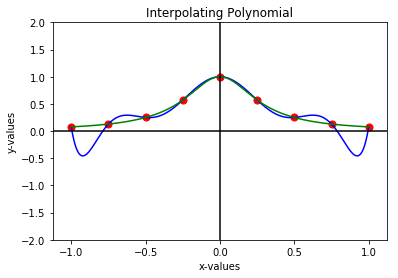

In [89]:
x0 = np.linspace(-1,1,9)
y = lambda x: (1/(1+12*x**2))
y0 = y(x0)

sol = newtdd(x0,y0,len(x0))

x = np.linspace(-1,1,1001)
f = lambdify('x', sol[1])
plt.plot(x,f(x),'b', x, y(x), 'g')
plt.scatter(x0,y0,c='r',s=50)
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.ylim(-2,2)
plt.axvline(0,-1,1,c='k')
plt.axhline(0,-1,1,c='k')
plt.title("Interpolating Polynomial")

If we choose the points such that they follow Chebyshev positioning, we will get a better interpolation without the runge phenomenom.

Choosing the Chebyshev roots as the base points for interpolations, distributes the interpolation error as evenly as possible.

To choose Chebyshev roots, we use the following theorem:

<strong>Theorem:</strong> The choice of real numbers $-1 \leq x_{1}, ... , x_{n} \leq 1$ that makes the value of 

$max_{-1 \leq x \leq 1} |(x - x_{i}) ... (x - x_{n})|$

as small as possible is:

$x_{i} = Cos \frac{(2n-1)\pi}{2n}$, for $i = 1, ..., n$

and the minimum value is given by $\frac{1}{2^{n-1}}$

<strong>Example 1:</strong> Interpolate the polynomial $p(x) = \frac{1}{1+12x^{2}}$ on the interval [-1, 1] using Chebyshev roots

In [104]:
def chev_roots(n):
    roots = np.zeros(n)
    
    for i in range(0, n):
        x_i = np.cos((2*i + 1)*np.pi/(2*(n)))
        roots[i] = x_i
    return roots
    

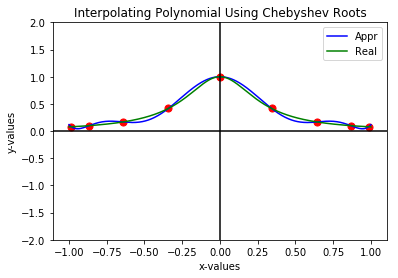

In [105]:
x0 = np.linspace(-1,1,9)
n = len(x0)
x_chev = chev_roots(n)
y = lambda x: 1/(1+12*x**2)
y0 = y(x_chev)
y1 = newtdd(x_chev,y0,len(x_chev))

x = np.linspace(-1,1,1001)
f = lambdify('x', y1[1])
plt.plot(x,f(x),'b', x, y(x), 'g')
plt.scatter(x_chev,y0,c='r',s=50)
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.ylim(-2,2)
plt.axvline(0,-1,1,c='k')
plt.axhline(0,-1,1,c='k')
plt.title("Interpolating Polynomial Using Chebyshev Roots")
plt.legend(['Appr','Real'])

If the interval used is different than [-1, 1], then we need momodify our chebyshev root function to cover all the points in the interval [a,b] as follows:

$x_{i} = \frac{b-a}{2} Cos(\frac{(2i-1)\pi}{2n}) + \frac{b+a}{2}$

In [106]:
def chev_roots_interv(n, interv):
    roots = np.zeros(n)
    a = interv[0]
    b = interv[1]
    for i in range(0, n):
        x_i = np.cos((2*i + 1)*np.pi/(2*(n)))*((b-a)/2) + ((b + a)/2)
        roots[i] = x_i
    return roots

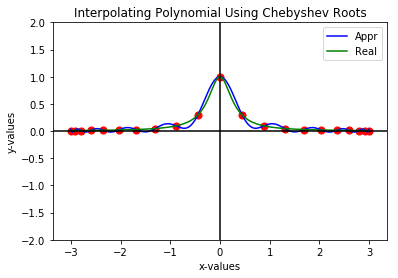

In [107]:
x0 = np.linspace(-3,3,21)
n = len(x0)
x_chev = chev_roots_interv(n, [-3, 3])
y = lambda x: 1/(1+12*x**2)
y0 = y(x_chev)
y1 = newtdd(x_chev,y0,len(x_chev))

x = np.linspace(-3,3,1001)
f = lambdify('x', y1[1])
plt.plot(x,f(x),'b', x, y(x), 'g')
plt.scatter(x_chev,y0,c='r',s=50)
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.ylim(-2,2)
plt.axvline(0,-3,3,c='k')
plt.axhline(0,-3,3,c='k')
plt.title("Interpolating Polynomial Using Chebyshev Roots")
plt.legend(['Appr','Real'])